In [1]:
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from modules.cleaners import clean_text
import string
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

from nltk.stem import WordNetLemmatizer


In [2]:
data_only_speech = pd.read_pickle('clean_speech.pkl')

df_after_first_clean = pd.read_pickle('speech_data_raw.pkl')

df_after_first_clean.drop(['speech'], axis=1)

df_after_first_clean['speech'] = data_only_speech.speech




#saving the new dataframe with the cleaned speaches and the presidents. 

df_after_first_clean.to_pickle('tokenized_dataframe.pkl')
df_after_first_clean


,year,President,Party,speech
0,1900,William McKinley,Republican,"[senate, house, representatives, outgoing, old..."
1,1901,Theodore Roosevelt,Republican,"[senate, house, representatives, congress, ass..."
2,1902,Theodore Roosevelt,Republican,"[senate, house, representatives, still, contin..."
3,1903,Theodore Roosevelt,Republican,"[senate, house, representatives, country, cong..."
4,1904,Theodore Roosevelt,Republican,"[senate, house, representatives, nation, conti..."
...,...,...,...,...
116,2017,Donald Trump,Republican,"[mr, speaker, mr, vice, president, members, co..."
117,2018,Donald Trump,Republican,"[mr, speaker, mr, vice, president, members, co..."
118,2019,Donald Trump,Republican,"[madam, speaker, mr, vice, president, members,..."
119,2020,Donald Trump,Republican,"[madam, speaker, mr, vice, president, members,..."


In [3]:
pickle_test = pd.read_pickle('speech_data_raw.pkl')

pickle_test.head()

,year,President,Party,speech
0,1900,William McKinley,Republican,To the Senate and House of Representatives: \n...
1,1901,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...
2,1902,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...
3,1903,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...
4,1904,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

#Dont know if we need this now.
"""

#Creating Document term matrix
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_after_first_clean.speech.astype(str))
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_after_first_clean.President

#data_dtm

"""

"\n\n#Creating Document term matrix\ncv = CountVectorizer(stop_words='english')\ndata_cv = cv.fit_transform(df_after_first_clean.speech.astype(str))\ndata_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())\ndata_dtm.index = df_after_first_clean.President\n\n#data_dtm\n\n"

In [5]:

#saving the document term matrix to use it in the sentiment file
#data_dtm.to_pickle("doc_term_matrix.pkl")

In [6]:
#Loading the Document term matrix 
#data = pd.read_pickle('doc_term_matrix.pkl')
#data = data.transpose()


In [7]:
seeData = df_after_first_clean['speech']
seeData

0      [senate, house, representatives, outgoing, old...
1      [senate, house, representatives, congress, ass...
2      [senate, house, representatives, still, contin...
3      [senate, house, representatives, country, cong...
4      [senate, house, representatives, nation, conti...
                             ...                        
116    [mr, speaker, mr, vice, president, members, co...
117    [mr, speaker, mr, vice, president, members, co...
118    [madam, speaker, mr, vice, president, members,...
119    [madam, speaker, mr, vice, president, members,...
120    [pm, edt, president, thank, applause, thank, t...
Name: speech, Length: 121, dtype: object

speech year: 1901


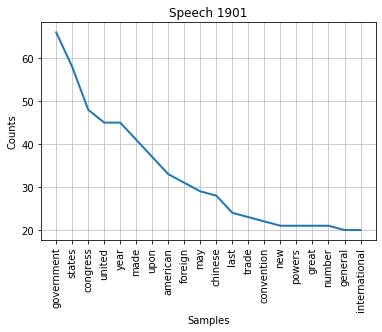

FreqDist({'government': 66, 'states': 58, 'congress': 48, 'united': 45, 'year': 45, 'made': 41, 'upon': 37, 'american': 33, 'foreign': 31, 'may': 29, 'chinese': 28, 'last': 24, 'trade': 23, 'convention': 22, 'new': 21, 'powers': 21, 'great': 21, 'number': 21, 'general': 20, 'international': 20, ...})
speech year: 1902


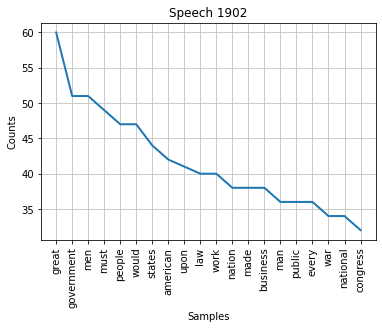

FreqDist({'great': 60, 'government': 51, 'men': 51, 'must': 49, 'people': 47, 'would': 47, 'states': 44, 'american': 42, 'upon': 41, 'law': 40, 'work': 40, 'nation': 38, 'made': 38, 'business': 38, 'man': 36, 'public': 36, 'every': 36, 'war': 34, 'national': 34, 'congress': 32, ...})
speech year: 1903


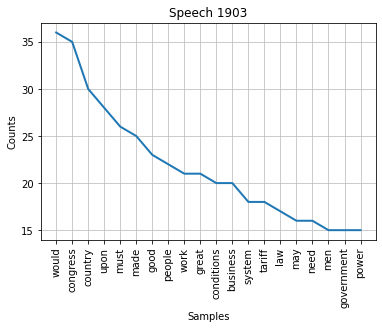

FreqDist({'would': 36, 'congress': 35, 'country': 30, 'upon': 28, 'must': 26, 'made': 25, 'good': 23, 'people': 22, 'work': 21, 'great': 21, 'conditions': 20, 'business': 20, 'system': 18, 'tariff': 18, 'law': 17, 'may': 16, 'need': 16, 'men': 15, 'government': 15, 'power': 15, ...})
speech year: 1904


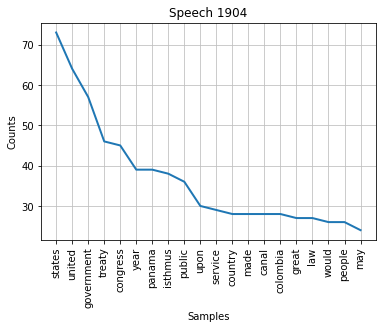

FreqDist({'states': 73, 'united': 64, 'government': 57, 'treaty': 46, 'congress': 45, 'year': 39, 'panama': 39, 'isthmus': 38, 'public': 36, 'upon': 30, 'service': 29, 'country': 28, 'made': 28, 'canal': 28, 'colombia': 28, 'great': 27, 'law': 27, 'would': 26, 'people': 26, 'may': 24, ...})
speech year: 1905


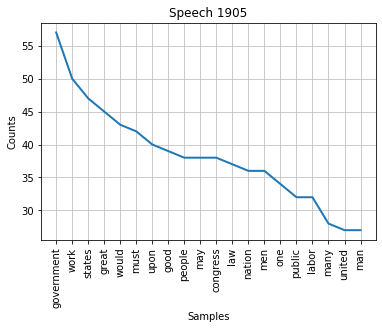

FreqDist({'government': 57, 'work': 50, 'states': 47, 'great': 45, 'would': 43, 'must': 42, 'upon': 40, 'good': 39, 'people': 38, 'may': 38, 'congress': 38, 'law': 37, 'nation': 36, 'men': 36, 'one': 34, 'public': 32, 'labor': 32, 'many': 28, 'united': 27, 'man': 27, ...})
speech year: 1906


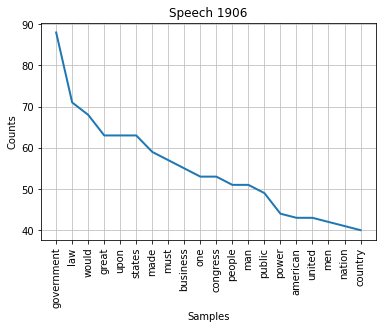

FreqDist({'government': 88, 'law': 71, 'would': 68, 'great': 63, 'upon': 63, 'states': 63, 'made': 59, 'must': 57, 'business': 55, 'one': 53, 'congress': 53, 'people': 51, 'man': 51, 'public': 49, 'power': 44, 'american': 43, 'united': 43, 'men': 42, 'nation': 41, 'country': 40, ...})
speech year: 1907


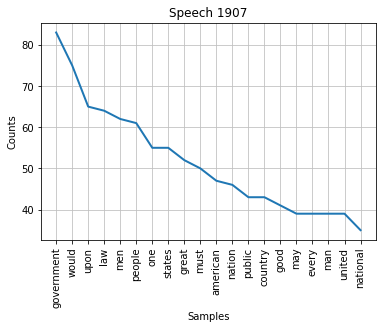

FreqDist({'government': 83, 'would': 75, 'upon': 65, 'law': 64, 'men': 62, 'people': 61, 'one': 55, 'states': 55, 'great': 52, 'must': 50, 'american': 47, 'nation': 46, 'public': 43, 'country': 43, 'good': 41, 'may': 39, 'every': 39, 'man': 39, 'united': 39, 'national': 35, ...})
speech year: 1908


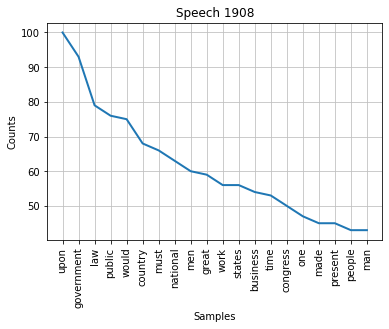

FreqDist({'upon': 100, 'government': 93, 'law': 79, 'public': 76, 'would': 75, 'country': 68, 'must': 66, 'national': 63, 'men': 60, 'great': 59, 'work': 56, 'states': 56, 'business': 54, 'time': 53, 'congress': 50, 'one': 47, 'made': 45, 'present': 45, 'people': 43, 'man': 43, ...})
speech year: 1909


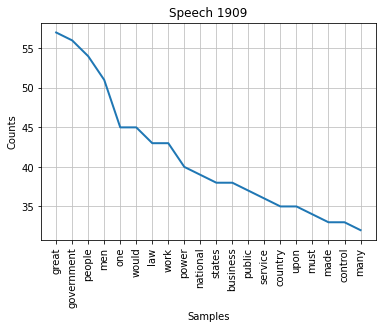

FreqDist({'great': 57, 'government': 56, 'people': 54, 'men': 51, 'one': 45, 'would': 45, 'law': 43, 'work': 43, 'power': 40, 'national': 39, 'states': 38, 'business': 38, 'public': 37, 'service': 36, 'country': 35, 'upon': 35, 'must': 34, 'made': 33, 'control': 33, 'many': 32, ...})
speech year: 1910


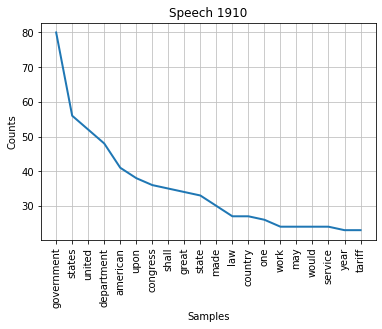

FreqDist({'government': 80, 'states': 56, 'united': 52, 'department': 48, 'american': 41, 'upon': 38, 'congress': 36, 'shall': 35, 'great': 34, 'state': 33, 'made': 30, 'law': 27, 'country': 27, 'one': 26, 'work': 24, 'may': 24, 'would': 24, 'service': 24, 'year': 23, 'tariff': 23, ...})
speech year: 1911


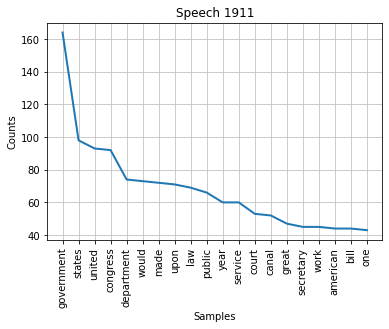

FreqDist({'government': 164, 'states': 98, 'united': 93, 'congress': 92, 'department': 74, 'would': 73, 'made': 72, 'upon': 71, 'law': 69, 'public': 66, 'year': 60, 'service': 60, 'court': 53, 'canal': 52, 'great': 47, 'secretary': 45, 'work': 45, 'american': 44, 'bill': 44, 'one': 43, ...})
speech year: 1912


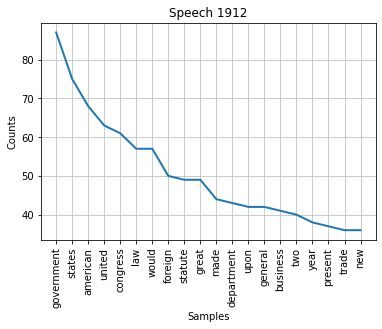

FreqDist({'government': 87, 'states': 75, 'american': 68, 'united': 63, 'congress': 61, 'law': 57, 'would': 57, 'foreign': 50, 'statute': 49, 'great': 49, 'made': 44, 'department': 43, 'upon': 42, 'general': 42, 'business': 41, 'two': 40, 'year': 38, 'present': 37, 'trade': 36, 'new': 36, ...})
speech year: 1913


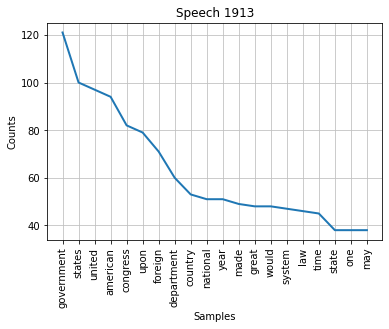

FreqDist({'government': 121, 'states': 100, 'united': 97, 'american': 94, 'congress': 82, 'upon': 79, 'foreign': 71, 'department': 60, 'country': 53, 'national': 51, 'year': 51, 'made': 49, 'great': 48, 'would': 48, 'system': 47, 'law': 46, 'time': 45, 'state': 38, 'one': 38, 'may': 38, ...})
speech year: 1914


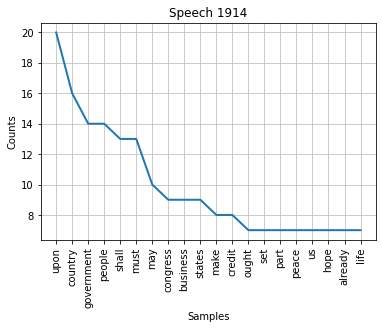

FreqDist({'upon': 20, 'country': 16, 'government': 14, 'people': 14, 'shall': 13, 'must': 13, 'may': 10, 'congress': 9, 'business': 9, 'states': 9, 'make': 8, 'credit': 8, 'ought': 7, 'set': 7, 'part': 7, 'peace': 7, 'us': 7, 'hope': 7, 'already': 7, 'life': 7, ...})
speech year: 1915


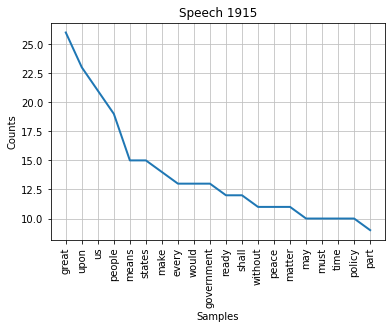

FreqDist({'great': 26, 'upon': 23, 'us': 21, 'people': 19, 'means': 15, 'states': 15, 'make': 14, 'every': 13, 'would': 13, 'government': 13, 'ready': 12, 'shall': 12, 'without': 11, 'peace': 11, 'matter': 11, 'may': 10, 'must': 10, 'time': 10, 'policy': 10, 'part': 9, ...})
speech year: 1916


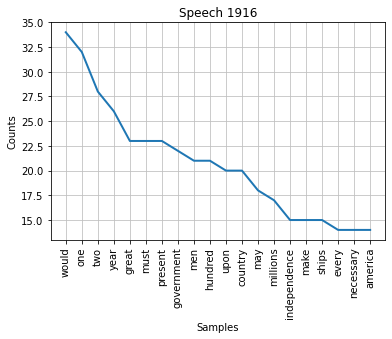

FreqDist({'would': 34, 'one': 32, 'two': 28, 'year': 26, 'great': 23, 'must': 23, 'present': 23, 'government': 22, 'men': 21, 'hundred': 21, 'upon': 20, 'country': 20, 'may': 18, 'millions': 17, 'independence': 15, 'make': 15, 'ships': 15, 'every': 14, 'necessary': 14, 'america': 14, ...})
speech year: 1917


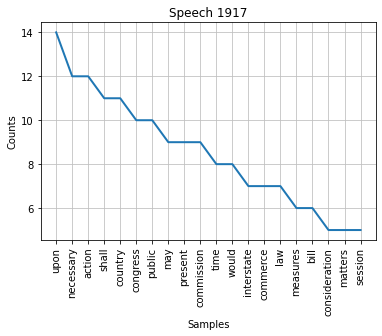

FreqDist({'upon': 14, 'necessary': 12, 'action': 12, 'shall': 11, 'country': 11, 'congress': 10, 'public': 10, 'may': 9, 'present': 9, 'commission': 9, 'time': 8, 'would': 8, 'interstate': 7, 'commerce': 7, 'law': 7, 'measures': 6, 'bill': 6, 'consideration': 5, 'matters': 5, 'session': 5, ...})
speech year: 1918


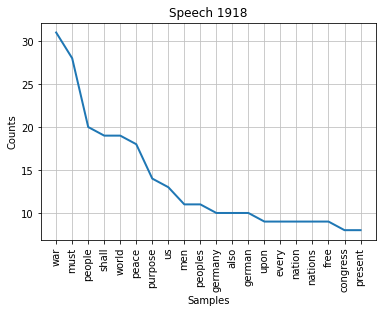

FreqDist({'war': 31, 'must': 28, 'people': 20, 'shall': 19, 'world': 19, 'peace': 18, 'purpose': 14, 'us': 13, 'men': 11, 'peoples': 11, 'germany': 10, 'also': 10, 'german': 10, 'upon': 9, 'every': 9, 'nation': 9, 'nations': 9, 'free': 9, 'congress': 8, 'present': 8, ...})
speech year: 1919


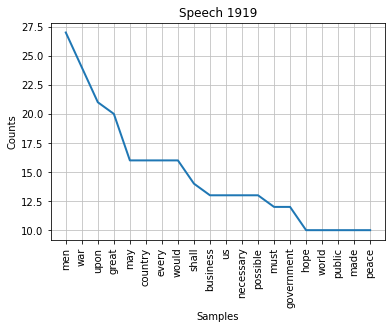

FreqDist({'men': 27, 'war': 24, 'upon': 21, 'great': 20, 'may': 16, 'country': 16, 'every': 16, 'would': 16, 'shall': 14, 'business': 13, 'us': 13, 'necessary': 13, 'possible': 13, 'must': 12, 'government': 12, 'hope': 10, 'world': 10, 'public': 10, 'made': 10, 'peace': 10, ...})
speech year: 1920


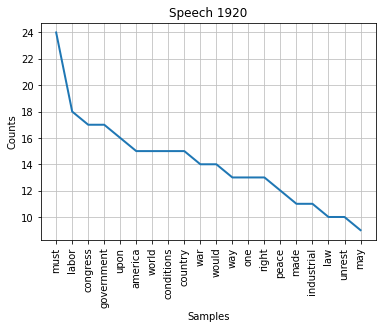

FreqDist({'must': 24, 'labor': 18, 'congress': 17, 'government': 17, 'upon': 16, 'america': 15, 'world': 15, 'conditions': 15, 'country': 15, 'war': 14, 'would': 14, 'way': 13, 'one': 13, 'right': 13, 'peace': 12, 'made': 11, 'industrial': 11, 'law': 10, 'unrest': 10, 'may': 9, ...})
speech year: 1921


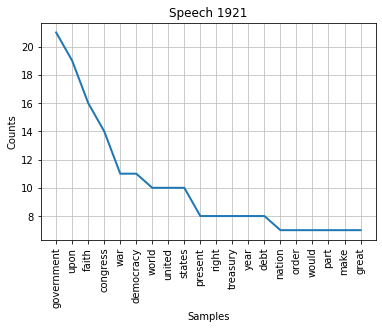

FreqDist({'government': 21, 'upon': 19, 'faith': 16, 'congress': 14, 'war': 11, 'democracy': 11, 'world': 10, 'united': 10, 'states': 10, 'present': 8, 'right': 8, 'treasury': 8, 'year': 8, 'debt': 8, 'nation': 7, 'order': 7, 'would': 7, 'part': 7, 'make': 7, 'great': 7, ...})
speech year: 1922


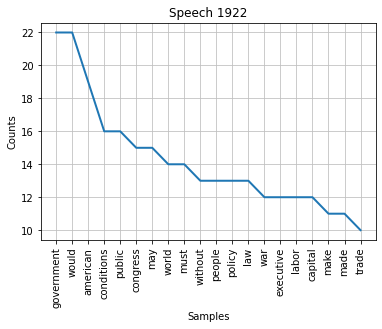

FreqDist({'government': 22, 'would': 22, 'american': 19, 'conditions': 16, 'public': 16, 'congress': 15, 'may': 15, 'world': 14, 'must': 14, 'without': 13, 'people': 13, 'policy': 13, 'law': 13, 'war': 12, 'executive': 12, 'labor': 12, 'capital': 12, 'make': 11, 'made': 11, 'trade': 10, ...})
speech year: 1923


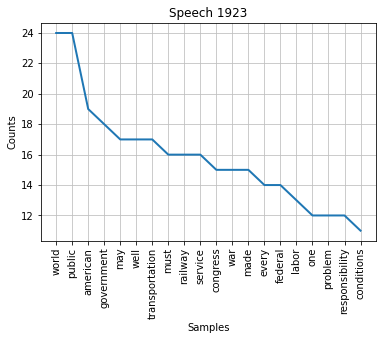

FreqDist({'world': 24, 'public': 24, 'american': 19, 'government': 18, 'may': 17, 'well': 17, 'transportation': 17, 'must': 16, 'railway': 16, 'service': 16, 'congress': 15, 'war': 15, 'made': 15, 'every': 14, 'federal': 14, 'labor': 13, 'one': 12, 'problem': 12, 'responsibility': 12, 'conditions': 11, ...})
speech year: 1924


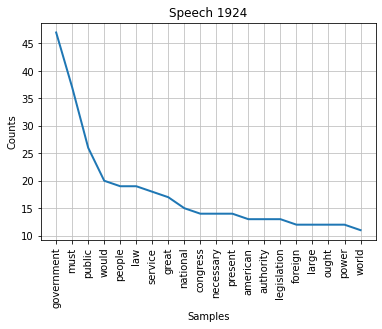

FreqDist({'government': 47, 'must': 37, 'public': 26, 'would': 20, 'people': 19, 'law': 19, 'service': 18, 'great': 17, 'national': 15, 'congress': 14, 'necessary': 14, 'present': 14, 'american': 13, 'authority': 13, 'legislation': 13, 'foreign': 12, 'large': 12, 'ought': 12, 'power': 12, 'world': 11, ...})
speech year: 1925


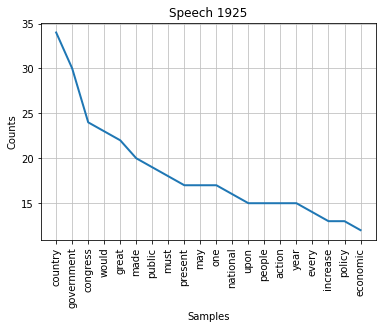

FreqDist({'country': 34, 'government': 30, 'congress': 24, 'would': 23, 'great': 22, 'made': 20, 'public': 19, 'must': 18, 'present': 17, 'may': 17, 'one': 17, 'national': 16, 'upon': 15, 'people': 15, 'action': 15, 'year': 15, 'every': 14, 'increase': 13, 'policy': 13, 'economic': 12, ...})
speech year: 1926


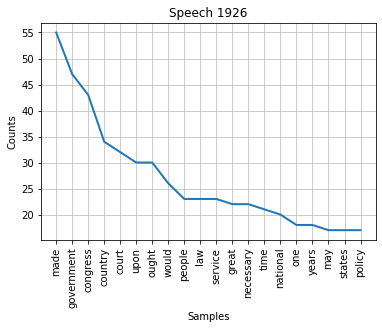

FreqDist({'made': 55, 'government': 47, 'congress': 43, 'country': 34, 'court': 32, 'upon': 30, 'ought': 30, 'would': 26, 'people': 23, 'law': 23, 'service': 23, 'great': 22, 'necessary': 22, 'time': 21, 'national': 20, 'one': 18, 'years': 18, 'may': 17, 'states': 17, 'policy': 17, ...})
speech year: 1927


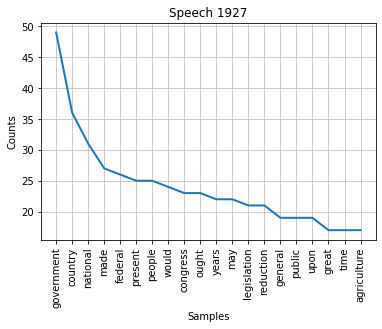

FreqDist({'government': 49, 'country': 36, 'national': 31, 'made': 27, 'federal': 26, 'present': 25, 'people': 25, 'would': 24, 'congress': 23, 'ought': 23, 'years': 22, 'may': 22, 'legislation': 21, 'reduction': 21, 'general': 19, 'public': 19, 'upon': 19, 'great': 17, 'time': 17, 'agriculture': 17, ...})
speech year: 1928


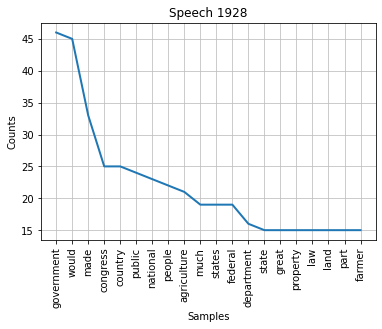

FreqDist({'government': 46, 'would': 45, 'made': 33, 'congress': 25, 'country': 25, 'public': 24, 'national': 23, 'people': 22, 'agriculture': 21, 'much': 19, 'states': 19, 'federal': 19, 'department': 16, 'state': 15, 'great': 15, 'property': 15, 'law': 15, 'land': 15, 'part': 15, 'farmer': 15, ...})
speech year: 1929


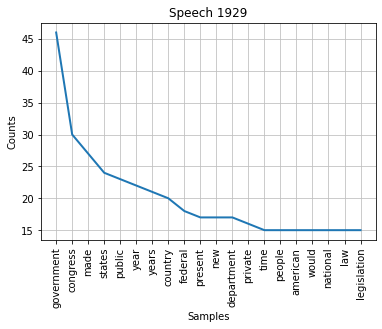

FreqDist({'government': 46, 'congress': 30, 'made': 27, 'states': 24, 'public': 23, 'year': 22, 'years': 21, 'country': 20, 'federal': 18, 'present': 17, 'new': 17, 'department': 17, 'private': 16, 'time': 15, 'people': 15, 'american': 15, 'would': 15, 'national': 15, 'law': 15, 'legislation': 15, ...})
speech year: 1930


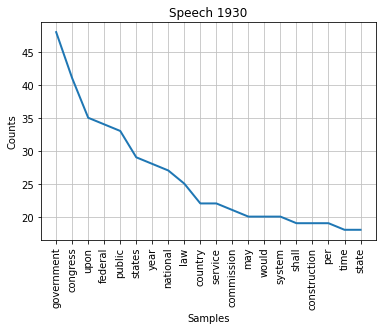

FreqDist({'government': 48, 'congress': 41, 'upon': 35, 'federal': 34, 'public': 33, 'states': 29, 'year': 28, 'national': 27, 'law': 25, 'country': 22, 'service': 22, 'commission': 21, 'may': 20, 'would': 20, 'system': 20, 'shall': 19, 'construction': 19, 'per': 19, 'time': 18, 'state': 18, ...})
speech year: 1931


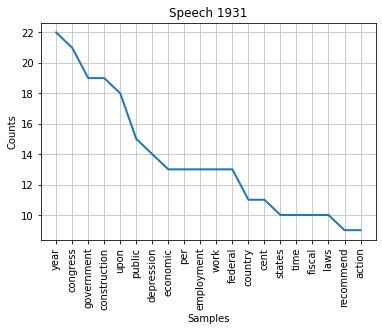

FreqDist({'year': 22, 'congress': 21, 'government': 19, 'construction': 19, 'upon': 18, 'public': 15, 'depression': 14, 'economic': 13, 'per': 13, 'employment': 13, 'work': 13, 'federal': 13, 'country': 11, 'cent': 11, 'states': 10, 'time': 10, 'fiscal': 10, 'laws': 10, 'recommend': 9, 'action': 9, ...})
speech year: 1932


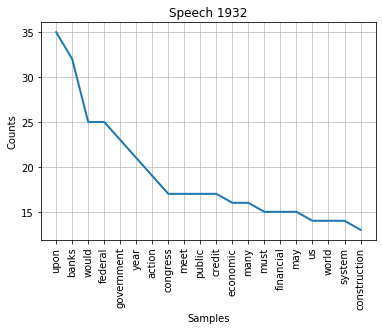

FreqDist({'upon': 35, 'banks': 32, 'would': 25, 'federal': 25, 'government': 23, 'year': 21, 'action': 19, 'congress': 17, 'meet': 17, 'public': 17, 'credit': 17, 'economic': 16, 'many': 16, 'must': 15, 'financial': 15, 'may': 15, 'us': 14, 'world': 14, 'system': 14, 'construction': 13, ...})
speech year: 1933


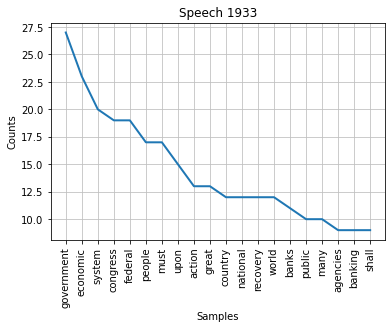

FreqDist({'government': 27, 'economic': 23, 'system': 20, 'congress': 19, 'federal': 19, 'people': 17, 'must': 17, 'upon': 15, 'action': 13, 'great': 13, 'country': 12, 'national': 12, 'recovery': 12, 'world': 12, 'banks': 11, 'public': 10, 'many': 10, 'agencies': 9, 'banking': 9, 'shall': 9, ...})
speech year: 1934


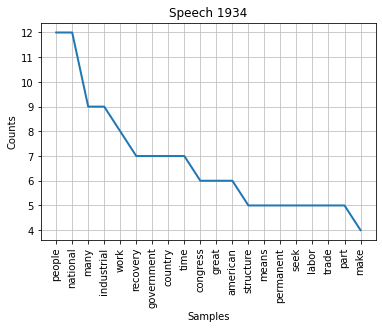

FreqDist({'people': 12, 'national': 12, 'many': 9, 'industrial': 9, 'work': 8, 'recovery': 7, 'government': 7, 'country': 7, 'time': 7, 'congress': 6, 'great': 6, 'american': 6, 'structure': 5, 'means': 5, 'permanent': 5, 'seek': 5, 'labor': 5, 'trade': 5, 'part': 5, 'make': 4, ...})
speech year: 1935


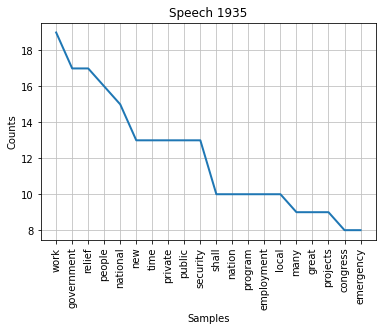

FreqDist({'work': 19, 'government': 17, 'relief': 17, 'people': 16, 'national': 15, 'new': 13, 'time': 13, 'private': 13, 'public': 13, 'security': 13, 'shall': 10, 'nation': 10, 'program': 10, 'employment': 10, 'local': 10, 'many': 9, 'great': 9, 'projects': 9, 'congress': 8, 'emergency': 8, ...})
speech year: 1936


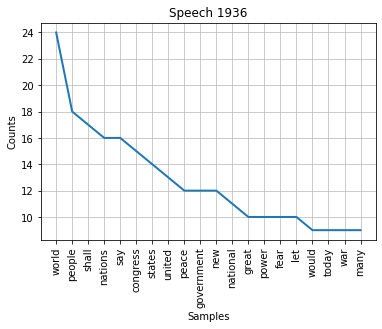

FreqDist({'world': 24, 'people': 18, 'shall': 17, 'nations': 16, 'say': 16, 'congress': 15, 'states': 14, 'united': 13, 'peace': 12, 'government': 12, 'new': 12, 'national': 11, 'great': 10, 'power': 10, 'fear': 10, 'let': 10, 'would': 9, 'today': 9, 'war': 9, 'many': 9, ...})
speech year: 1937


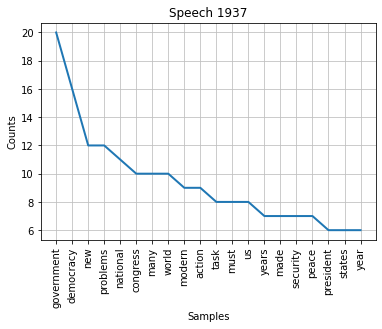

FreqDist({'government': 20, 'democracy': 16, 'new': 12, 'problems': 12, 'national': 11, 'congress': 10, 'many': 10, 'world': 10, 'modern': 9, 'action': 9, 'task': 8, 'must': 8, 'us': 8, 'years': 7, 'made': 7, 'security': 7, 'peace': 7, 'president': 6, 'states': 6, 'year': 6, ...})
speech year: 1938


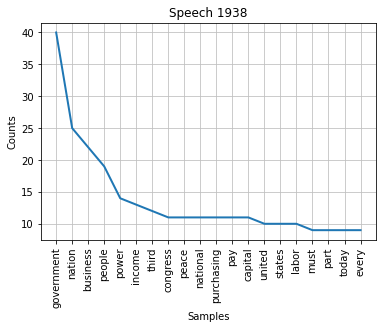

FreqDist({'government': 40, 'nation': 25, 'business': 22, 'people': 19, 'power': 14, 'income': 13, 'third': 12, 'congress': 11, 'peace': 11, 'national': 11, 'purchasing': 11, 'pay': 11, 'capital': 11, 'united': 10, 'states': 10, 'labor': 10, 'must': 9, 'part': 9, 'today': 9, 'every': 9, ...})
speech year: 1939


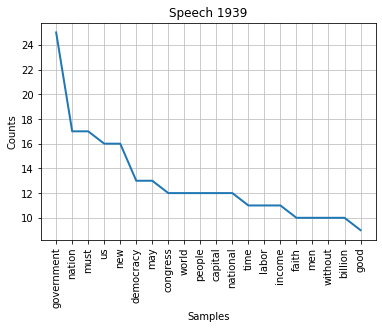

FreqDist({'government': 25, 'nation': 17, 'must': 17, 'us': 16, 'new': 16, 'democracy': 13, 'may': 13, 'congress': 12, 'world': 12, 'people': 12, 'capital': 12, 'national': 12, 'time': 11, 'labor': 11, 'income': 11, 'faith': 10, 'men': 10, 'without': 10, 'billion': 10, 'good': 9, ...})
speech year: 1940


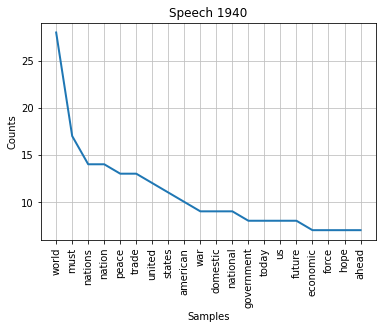

FreqDist({'world': 28, 'must': 17, 'nations': 14, 'nation': 14, 'peace': 13, 'trade': 13, 'united': 12, 'states': 11, 'american': 10, 'war': 9, 'domestic': 9, 'national': 9, 'government': 8, 'today': 8, 'us': 8, 'future': 8, 'economic': 7, 'force': 7, 'hope': 7, 'ahead': 7, ...})
speech year: 1941


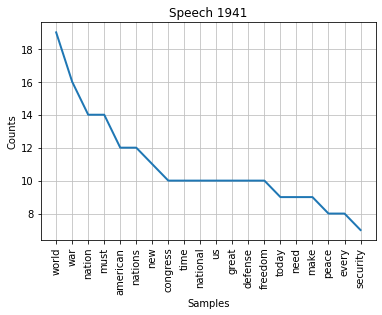

FreqDist({'world': 19, 'war': 16, 'nation': 14, 'must': 14, 'american': 12, 'nations': 12, 'new': 11, 'congress': 10, 'time': 10, 'national': 10, 'us': 10, 'great': 10, 'defense': 10, 'freedom': 10, 'today': 9, 'need': 9, 'make': 9, 'peace': 8, 'every': 8, 'security': 7, ...})
speech year: 1942


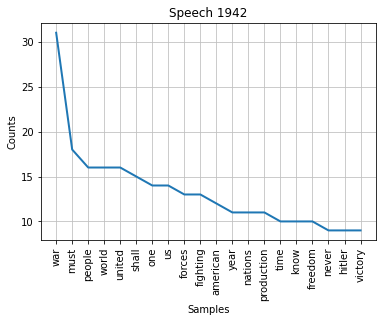

FreqDist({'war': 31, 'must': 18, 'people': 16, 'world': 16, 'united': 16, 'shall': 15, 'one': 14, 'us': 14, 'forces': 13, 'fighting': 13, 'american': 12, 'year': 11, 'nations': 11, 'production': 11, 'time': 10, 'know': 10, 'freedom': 10, 'never': 9, 'hitler': 9, 'victory': 9, ...})
speech year: 1943


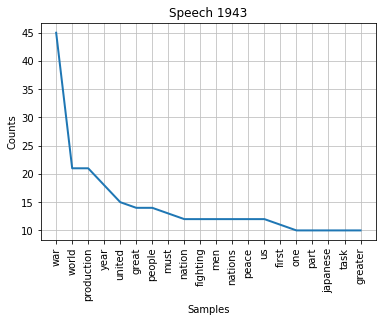

FreqDist({'war': 45, 'world': 21, 'production': 21, 'year': 18, 'united': 15, 'great': 14, 'people': 14, 'must': 13, 'nation': 12, 'fighting': 12, 'men': 12, 'nations': 12, 'peace': 12, 'us': 12, 'first': 11, 'one': 10, 'part': 10, 'japanese': 10, 'task': 10, 'greater': 10, ...})
speech year: 1944


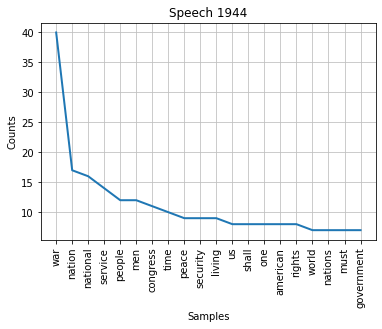

FreqDist({'war': 40, 'nation': 17, 'national': 16, 'service': 14, 'people': 12, 'men': 12, 'congress': 11, 'time': 10, 'peace': 9, 'security': 9, 'living': 9, 'us': 8, 'shall': 8, 'one': 8, 'american': 8, 'rights': 8, 'world': 7, 'nations': 7, 'must': 7, 'government': 7, ...})
speech year: 1945


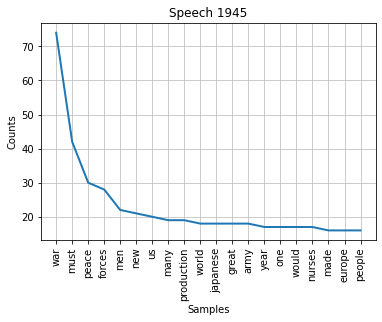

FreqDist({'war': 74, 'must': 42, 'peace': 30, 'forces': 28, 'men': 22, 'new': 21, 'us': 20, 'many': 19, 'production': 19, 'world': 18, 'japanese': 18, 'great': 18, 'army': 18, 'year': 17, 'one': 17, 'would': 17, 'nurses': 17, 'made': 16, 'europe': 16, 'people': 16, ...})
speech year: 1946


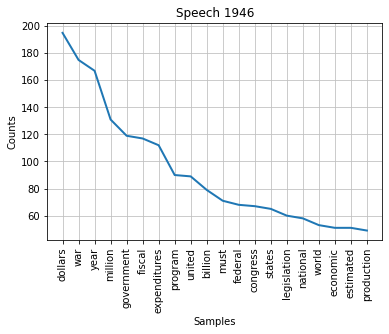

FreqDist({'dollars': 195, 'war': 175, 'year': 167, 'million': 131, 'government': 119, 'fiscal': 117, 'expenditures': 112, 'program': 90, 'united': 89, 'billion': 79, 'must': 71, 'federal': 68, 'congress': 67, 'states': 65, 'legislation': 60, 'national': 58, 'world': 53, 'economic': 51, 'estimated': 51, 'production': 49, ...})
speech year: 1947


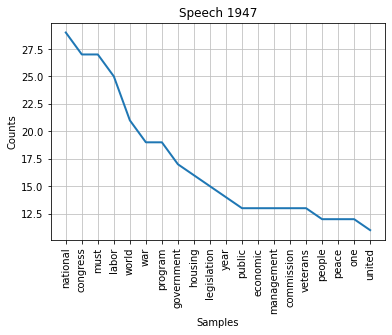

FreqDist({'national': 29, 'congress': 27, 'must': 27, 'labor': 25, 'world': 21, 'war': 19, 'program': 19, 'government': 17, 'housing': 16, 'legislation': 15, 'year': 14, 'public': 13, 'economic': 13, 'management': 13, 'commission': 13, 'veterans': 13, 'people': 12, 'peace': 12, 'one': 12, 'united': 11, ...})
speech year: 1948


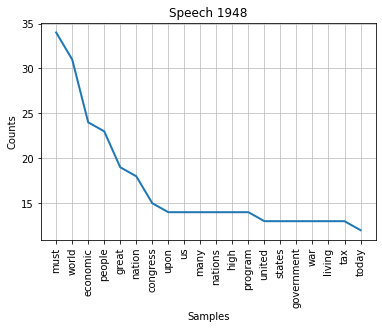

FreqDist({'must': 34, 'world': 31, 'economic': 24, 'people': 23, 'great': 19, 'nation': 18, 'congress': 15, 'upon': 14, 'us': 14, 'many': 14, 'nations': 14, 'high': 14, 'program': 14, 'united': 13, 'states': 13, 'government': 13, 'war': 13, 'living': 13, 'tax': 13, 'today': 12, ...})
speech year: 1949


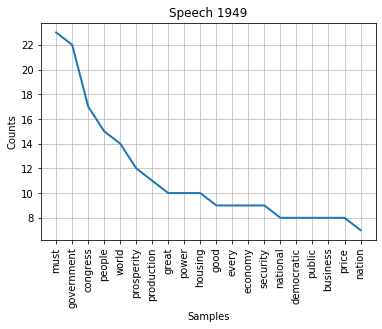

FreqDist({'must': 23, 'government': 22, 'congress': 17, 'people': 15, 'world': 14, 'prosperity': 12, 'production': 11, 'great': 10, 'power': 10, 'housing': 10, 'good': 9, 'every': 9, 'economy': 9, 'security': 9, 'national': 8, 'democratic': 8, 'public': 8, 'business': 8, 'price': 8, 'nation': 7, ...})
speech year: 1950


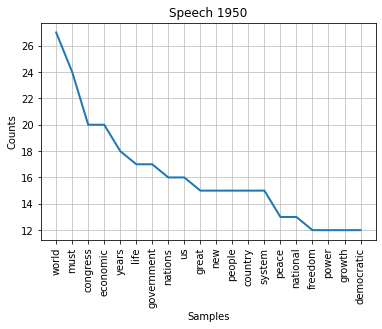

FreqDist({'world': 27, 'must': 24, 'congress': 20, 'economic': 20, 'years': 18, 'life': 17, 'government': 17, 'nations': 16, 'us': 16, 'great': 15, 'new': 15, 'people': 15, 'country': 15, 'system': 15, 'peace': 13, 'national': 13, 'freedom': 12, 'power': 12, 'growth': 12, 'democratic': 12, ...})
speech year: 1951


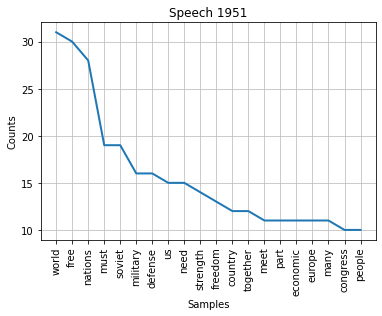

FreqDist({'world': 31, 'free': 30, 'nations': 28, 'must': 19, 'soviet': 19, 'military': 16, 'defense': 16, 'us': 15, 'need': 15, 'strength': 14, 'freedom': 13, 'country': 12, 'together': 12, 'meet': 11, 'part': 11, 'economic': 11, 'europe': 11, 'many': 11, 'congress': 10, 'people': 10, ...})
speech year: 1952


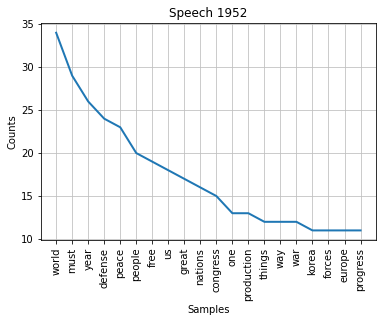

FreqDist({'world': 34, 'must': 29, 'year': 26, 'defense': 24, 'peace': 23, 'people': 20, 'free': 19, 'us': 18, 'great': 17, 'nations': 16, 'congress': 15, 'one': 13, 'production': 13, 'things': 12, 'way': 12, 'war': 12, 'korea': 11, 'forces': 11, 'europe': 11, 'progress': 11, ...})
speech year: 1953


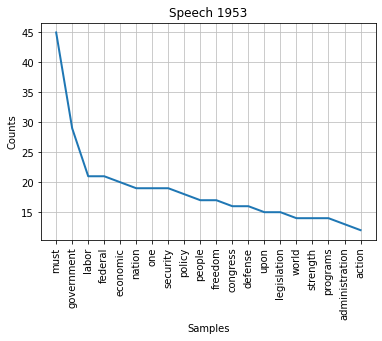

FreqDist({'must': 45, 'government': 29, 'labor': 21, 'federal': 21, 'economic': 20, 'nation': 19, 'one': 19, 'security': 19, 'policy': 18, 'people': 17, 'freedom': 17, 'congress': 16, 'defense': 16, 'upon': 15, 'legislation': 15, 'world': 14, 'strength': 14, 'programs': 14, 'administration': 13, 'action': 12, ...})
speech year: 1954


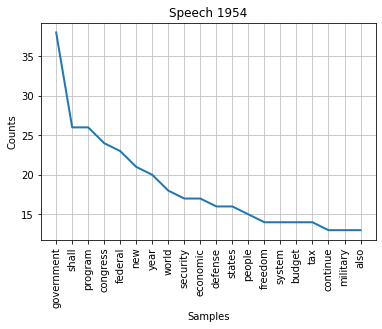

FreqDist({'government': 38, 'shall': 26, 'program': 26, 'congress': 24, 'federal': 23, 'new': 21, 'year': 20, 'world': 18, 'security': 17, 'economic': 17, 'defense': 16, 'states': 16, 'people': 15, 'freedom': 14, 'system': 14, 'budget': 14, 'tax': 14, 'continue': 13, 'military': 13, 'also': 13, ...})
speech year: 1955


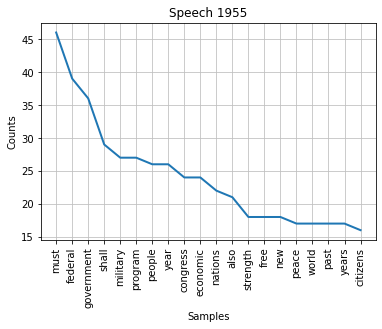

FreqDist({'must': 46, 'federal': 39, 'government': 36, 'shall': 29, 'military': 27, 'program': 27, 'people': 26, 'year': 26, 'congress': 24, 'economic': 24, 'nations': 22, 'also': 21, 'strength': 18, 'free': 18, 'new': 18, 'peace': 17, 'world': 17, 'past': 17, 'years': 17, 'citizens': 16, ...})
speech year: 1956


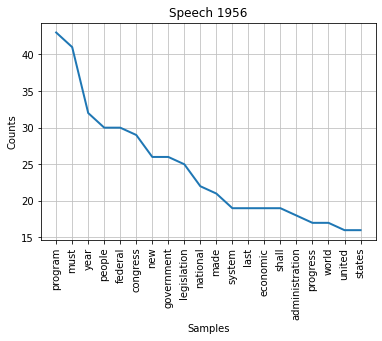

FreqDist({'program': 43, 'must': 41, 'year': 32, 'people': 30, 'federal': 30, 'congress': 29, 'new': 26, 'government': 26, 'legislation': 25, 'national': 22, 'made': 21, 'system': 19, 'last': 19, 'economic': 19, 'shall': 19, 'administration': 18, 'progress': 17, 'world': 17, 'united': 16, 'states': 16, ...})
speech year: 1957


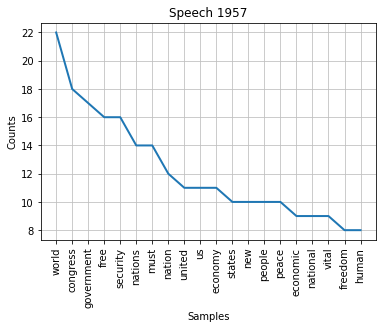

FreqDist({'world': 22, 'congress': 18, 'government': 17, 'free': 16, 'security': 16, 'nations': 14, 'must': 14, 'nation': 12, 'united': 11, 'us': 11, 'economy': 11, 'states': 10, 'new': 10, 'people': 10, 'peace': 10, 'economic': 9, 'national': 9, 'vital': 9, 'freedom': 8, 'human': 8, ...})
speech year: 1958


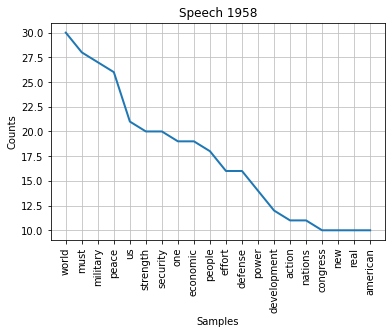

FreqDist({'world': 30, 'must': 28, 'military': 27, 'peace': 26, 'us': 21, 'strength': 20, 'security': 20, 'one': 19, 'economic': 19, 'people': 18, 'effort': 16, 'defense': 16, 'power': 14, 'development': 12, 'action': 11, 'nations': 11, 'congress': 10, 'new': 10, 'real': 10, 'american': 10, ...})
speech year: 1959


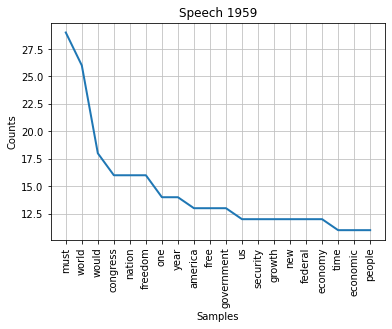

FreqDist({'must': 29, 'world': 26, 'would': 18, 'congress': 16, 'nation': 16, 'freedom': 16, 'one': 14, 'year': 14, 'america': 13, 'free': 13, 'government': 13, 'us': 12, 'security': 12, 'growth': 12, 'new': 12, 'federal': 12, 'economy': 12, 'time': 11, 'economic': 11, 'people': 11, ...})
speech year: 1960


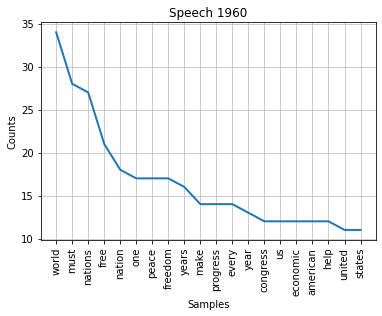

FreqDist({'world': 34, 'must': 28, 'nations': 27, 'free': 21, 'nation': 18, 'one': 17, 'peace': 17, 'freedom': 17, 'years': 16, 'make': 14, 'progress': 14, 'every': 14, 'year': 13, 'congress': 12, 'us': 12, 'economic': 12, 'american': 12, 'help': 12, 'united': 11, 'states': 11, ...})
speech year: 1961


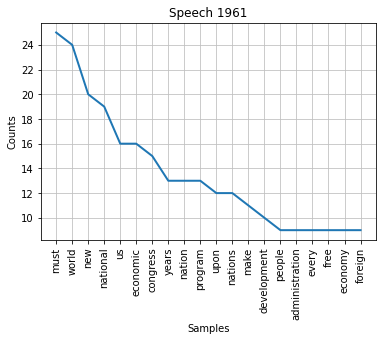

FreqDist({'must': 25, 'world': 24, 'new': 20, 'national': 19, 'us': 16, 'economic': 16, 'congress': 15, 'years': 13, 'nation': 13, 'program': 13, 'upon': 12, 'nations': 12, 'make': 11, 'development': 10, 'people': 9, 'administration': 9, 'every': 9, 'free': 9, 'economy': 9, 'foreign': 9, ...})
speech year: 1962


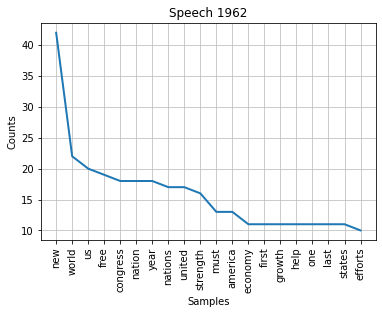

FreqDist({'new': 42, 'world': 22, 'us': 20, 'free': 19, 'congress': 18, 'nation': 18, 'year': 18, 'nations': 17, 'united': 17, 'strength': 16, 'must': 13, 'america': 13, 'economy': 11, 'first': 11, 'growth': 11, 'help': 11, 'one': 11, 'last': 11, 'states': 11, 'efforts': 10, ...})
speech year: 1963


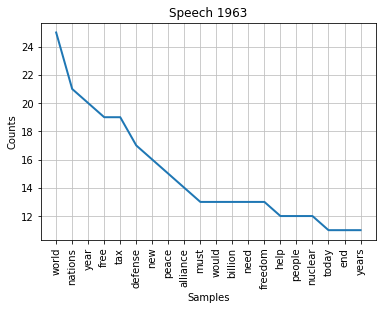

FreqDist({'world': 25, 'nations': 21, 'year': 20, 'free': 19, 'tax': 19, 'defense': 17, 'new': 16, 'peace': 15, 'alliance': 14, 'must': 13, 'would': 13, 'billion': 13, 'need': 13, 'freedom': 13, 'help': 12, 'people': 12, 'nuclear': 12, 'today': 11, 'end': 11, 'years': 11, ...})
speech year: 1964


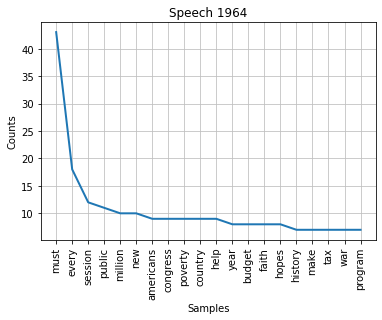

FreqDist({'must': 43, 'every': 18, 'session': 12, 'public': 11, 'million': 10, 'new': 10, 'americans': 9, 'congress': 9, 'poverty': 9, 'country': 9, 'help': 9, 'year': 8, 'budget': 8, 'faith': 8, 'hopes': 8, 'history': 7, 'make': 7, 'tax': 7, 'war': 7, 'program': 7, ...})
speech year: 1965


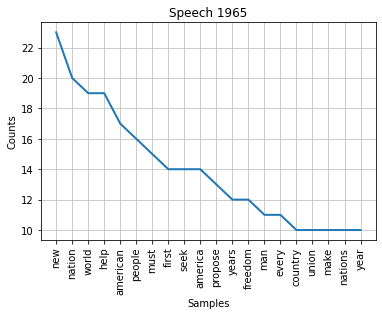

FreqDist({'new': 23, 'nation': 20, 'world': 19, 'help': 19, 'american': 17, 'people': 16, 'must': 15, 'first': 14, 'seek': 14, 'america': 14, 'propose': 13, 'years': 12, 'freedom': 12, 'man': 11, 'every': 11, 'country': 10, 'union': 10, 'make': 10, 'nations': 10, 'year': 10, ...})
speech year: 1966


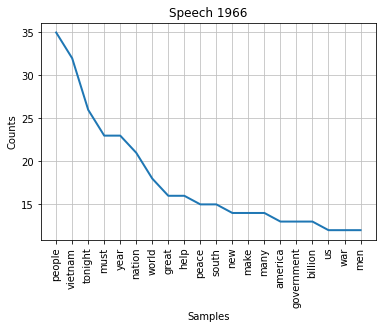

FreqDist({'people': 35, 'vietnam': 32, 'tonight': 26, 'must': 23, 'year': 23, 'nation': 21, 'world': 18, 'great': 16, 'help': 16, 'peace': 15, 'south': 15, 'new': 14, 'make': 14, 'many': 14, 'america': 13, 'government': 13, 'billion': 13, 'us': 12, 'war': 12, 'men': 12, ...})
speech year: 1967


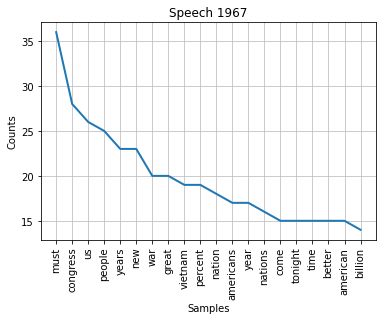

FreqDist({'must': 36, 'congress': 28, 'us': 26, 'people': 25, 'years': 23, 'new': 23, 'war': 20, 'great': 20, 'vietnam': 19, 'percent': 19, 'nation': 18, 'americans': 17, 'year': 17, 'nations': 16, 'come': 15, 'tonight': 15, 'time': 15, 'better': 15, 'american': 15, 'billion': 14, ...})
speech year: 1968


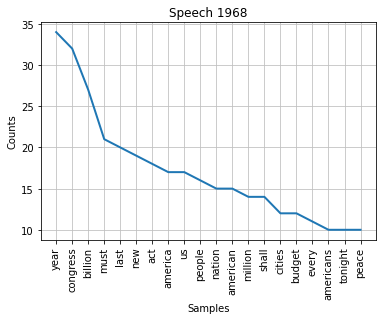

FreqDist({'year': 34, 'congress': 32, 'billion': 27, 'must': 21, 'last': 20, 'new': 19, 'act': 18, 'america': 17, 'us': 17, 'people': 16, 'nation': 15, 'american': 15, 'million': 14, 'shall': 14, 'cities': 12, 'budget': 12, 'every': 11, 'americans': 10, 'tonight': 10, 'peace': 10, ...})
speech year: 1969


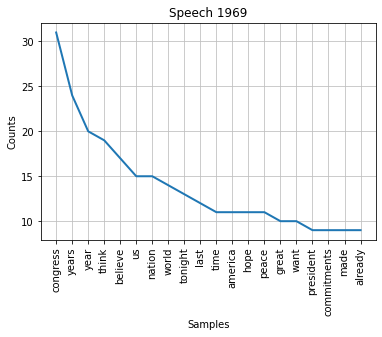

FreqDist({'congress': 31, 'years': 24, 'year': 20, 'think': 19, 'believe': 17, 'us': 15, 'nation': 15, 'world': 14, 'tonight': 13, 'last': 12, 'time': 11, 'america': 11, 'hope': 11, 'peace': 11, 'great': 10, 'want': 10, 'president': 9, 'commitments': 9, 'made': 9, 'already': 9, ...})
speech year: 1970


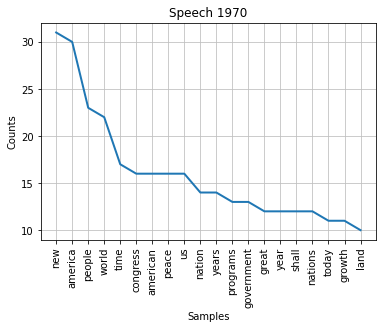

FreqDist({'new': 31, 'america': 30, 'people': 23, 'world': 22, 'time': 17, 'congress': 16, 'american': 16, 'peace': 16, 'us': 16, 'nation': 14, 'years': 14, 'programs': 13, 'government': 13, 'great': 12, 'year': 12, 'shall': 12, 'nations': 12, 'today': 11, 'growth': 11, 'land': 10, ...})
speech year: 1971


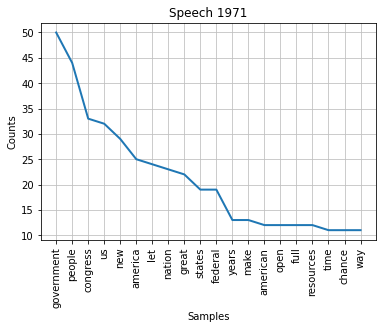

FreqDist({'government': 50, 'people': 44, 'congress': 33, 'us': 32, 'new': 29, 'america': 25, 'let': 24, 'nation': 23, 'great': 22, 'states': 19, 'federal': 19, 'years': 13, 'make': 13, 'american': 12, 'open': 12, 'full': 12, 'resources': 12, 'time': 11, 'chance': 11, 'way': 11, ...})
speech year: 1972


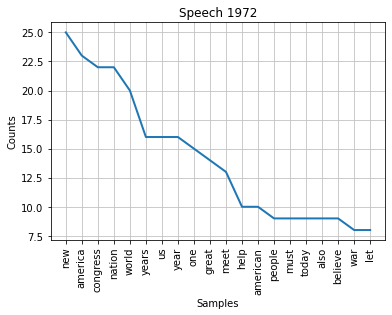

FreqDist({'new': 25, 'america': 23, 'congress': 22, 'nation': 22, 'world': 20, 'years': 16, 'us': 16, 'year': 16, 'one': 15, 'great': 14, 'meet': 13, 'help': 10, 'american': 10, 'people': 9, 'must': 9, 'today': 9, 'also': 9, 'believe': 9, 'war': 8, 'let': 8, ...})
speech year: 1973


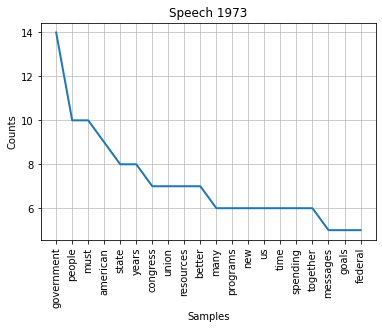

FreqDist({'government': 14, 'people': 10, 'must': 10, 'american': 9, 'state': 8, 'years': 8, 'congress': 7, 'union': 7, 'resources': 7, 'better': 7, 'many': 6, 'programs': 6, 'new': 6, 'us': 6, 'time': 6, 'spending': 6, 'together': 6, 'messages': 5, 'goals': 5, 'federal': 5, ...})
speech year: 1974


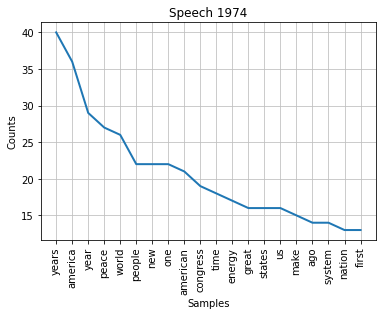

FreqDist({'years': 40, 'america': 36, 'year': 29, 'peace': 27, 'world': 26, 'people': 22, 'new': 22, 'one': 22, 'american': 21, 'congress': 19, 'time': 18, 'energy': 17, 'great': 16, 'states': 16, 'us': 16, 'make': 15, 'ago': 14, 'system': 14, 'nation': 13, 'first': 13, ...})
speech year: 1975


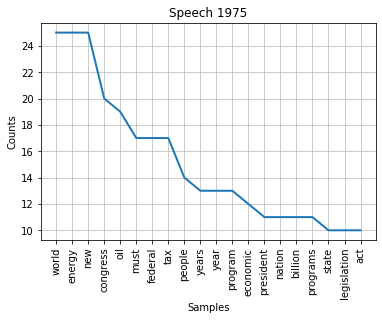

FreqDist({'world': 25, 'energy': 25, 'new': 25, 'congress': 20, 'oil': 19, 'must': 17, 'federal': 17, 'tax': 17, 'people': 14, 'years': 13, 'year': 13, 'program': 13, 'economic': 12, 'president': 11, 'nation': 11, 'billion': 11, 'programs': 11, 'state': 10, 'legislation': 10, 'act': 10, ...})
speech year: 1976


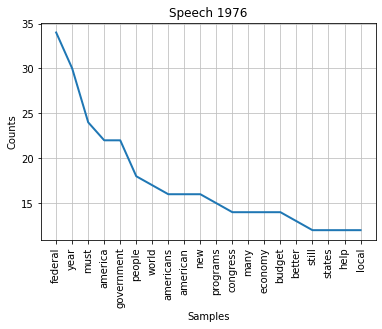

FreqDist({'federal': 34, 'year': 30, 'must': 24, 'america': 22, 'government': 22, 'people': 18, 'world': 17, 'americans': 16, 'american': 16, 'new': 16, 'programs': 15, 'congress': 14, 'many': 14, 'economy': 14, 'budget': 14, 'better': 13, 'still': 12, 'states': 12, 'help': 12, 'local': 12, ...})
speech year: 1977


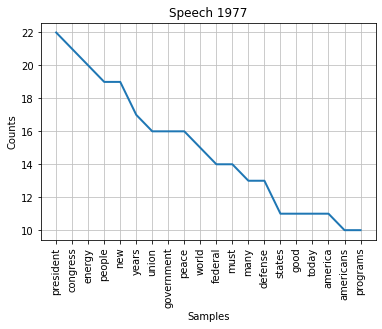

FreqDist({'president': 22, 'congress': 21, 'energy': 20, 'people': 19, 'new': 19, 'years': 17, 'union': 16, 'government': 16, 'peace': 16, 'world': 15, 'federal': 14, 'must': 14, 'many': 13, 'defense': 13, 'states': 11, 'good': 11, 'today': 11, 'america': 11, 'americans': 10, 'programs': 10, ...})
speech year: 1978


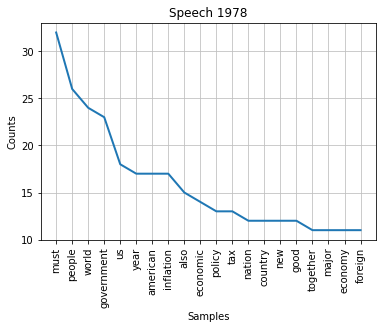

FreqDist({'must': 32, 'people': 26, 'world': 24, 'government': 23, 'us': 18, 'year': 17, 'american': 17, 'inflation': 17, 'also': 15, 'economic': 14, 'policy': 13, 'tax': 13, 'nation': 12, 'country': 12, 'new': 12, 'good': 12, 'together': 11, 'major': 11, 'economy': 11, 'foreign': 11, ...})
speech year: 1979


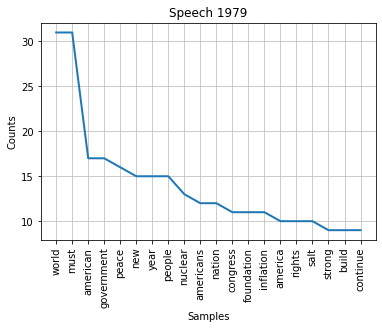

FreqDist({'world': 31, 'must': 31, 'american': 17, 'government': 17, 'peace': 16, 'new': 15, 'year': 15, 'people': 15, 'nuclear': 13, 'americans': 12, 'nation': 12, 'congress': 11, 'foundation': 11, 'inflation': 11, 'america': 10, 'rights': 10, 'salt': 10, 'strong': 9, 'build': 9, 'continue': 9, ...})
speech year: 1980


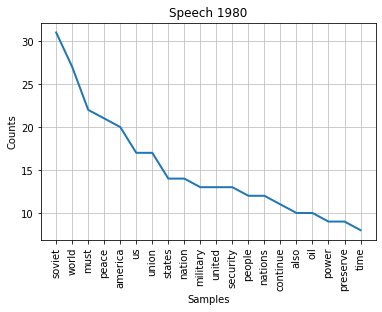

FreqDist({'soviet': 31, 'world': 27, 'must': 22, 'peace': 21, 'america': 20, 'us': 17, 'union': 17, 'states': 14, 'nation': 14, 'military': 13, 'united': 13, 'security': 13, 'people': 12, 'nations': 12, 'continue': 11, 'also': 10, 'oil': 10, 'power': 9, 'preserve': 9, 'time': 8, ...})
speech year: 1981


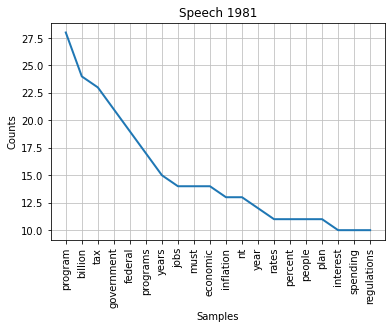

FreqDist({'program': 28, 'billion': 24, 'tax': 23, 'government': 21, 'federal': 19, 'programs': 17, 'years': 15, 'jobs': 14, 'must': 14, 'economic': 14, 'inflation': 13, 'nt': 13, 'year': 12, 'rates': 11, 'percent': 11, 'people': 11, 'plan': 11, 'interest': 10, 'spending': 10, 'regulations': 10, ...})
speech year: 1982


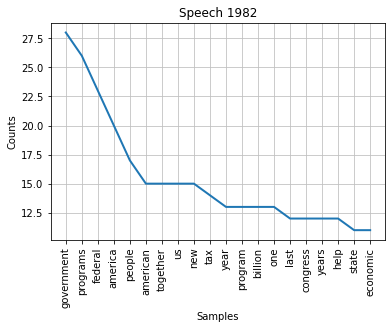

FreqDist({'government': 28, 'programs': 26, 'federal': 23, 'america': 20, 'people': 17, 'american': 15, 'together': 15, 'us': 15, 'new': 15, 'tax': 14, 'year': 13, 'program': 13, 'billion': 13, 'one': 13, 'last': 12, 'congress': 12, 'years': 12, 'help': 12, 'state': 11, 'economic': 11, ...})
speech year: 1983


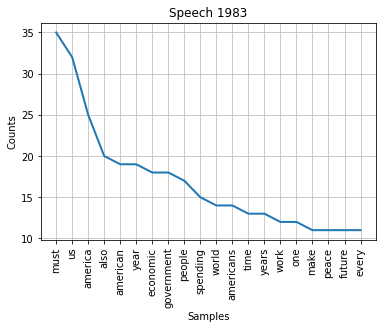

FreqDist({'must': 35, 'us': 32, 'america': 25, 'also': 20, 'american': 19, 'year': 19, 'economic': 18, 'government': 18, 'people': 17, 'spending': 15, 'world': 14, 'americans': 14, 'time': 13, 'years': 13, 'work': 12, 'one': 12, 'make': 11, 'peace': 11, 'future': 11, 'every': 11, ...})
speech year: 1984


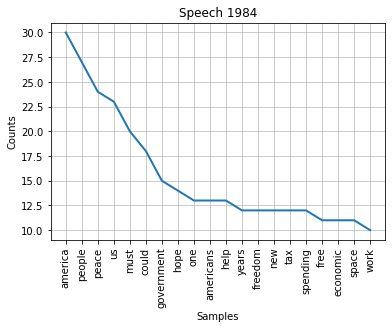

FreqDist({'america': 30, 'people': 27, 'peace': 24, 'us': 23, 'must': 20, 'could': 18, 'government': 15, 'hope': 14, 'one': 13, 'americans': 13, 'help': 13, 'years': 12, 'freedom': 12, 'new': 12, 'tax': 12, 'spending': 12, 'free': 11, 'economic': 11, 'space': 11, 'work': 10, ...})
speech year: 1985


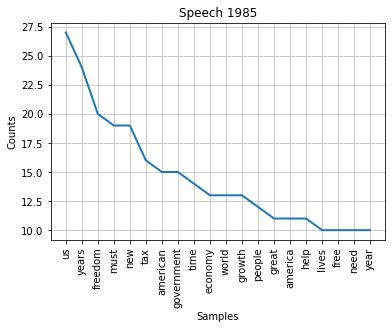

FreqDist({'us': 27, 'years': 24, 'freedom': 20, 'must': 19, 'new': 19, 'tax': 16, 'american': 15, 'government': 15, 'time': 14, 'economy': 13, 'world': 13, 'growth': 13, 'people': 12, 'great': 11, 'america': 11, 'help': 11, 'lives': 10, 'free': 10, 'need': 10, 'year': 10, ...})
speech year: 1986


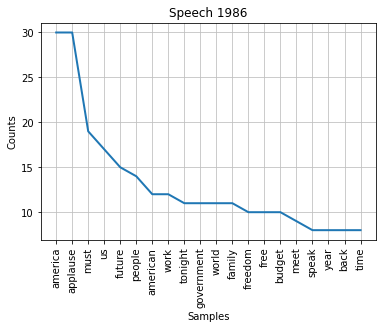

FreqDist({'america': 30, 'applause': 30, 'must': 19, 'us': 17, 'future': 15, 'people': 14, 'american': 12, 'work': 12, 'tonight': 11, 'government': 11, 'world': 11, 'family': 11, 'freedom': 10, 'free': 10, 'budget': 10, 'meet': 9, 'speak': 8, 'year': 8, 'back': 8, 'time': 8, ...})
speech year: 1987


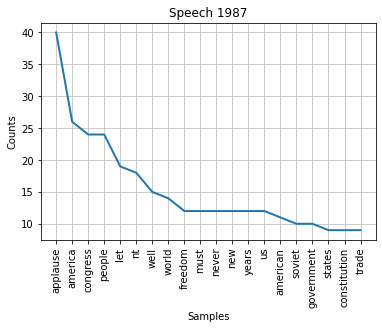

FreqDist({'applause': 40, 'america': 26, 'congress': 24, 'people': 24, 'let': 19, 'nt': 18, 'well': 15, 'world': 14, 'freedom': 12, 'must': 12, 'never': 12, 'new': 12, 'years': 12, 'us': 12, 'american': 11, 'soviet': 10, 'government': 10, 'states': 9, 'constitution': 9, 'trade': 9, ...})
speech year: 1988


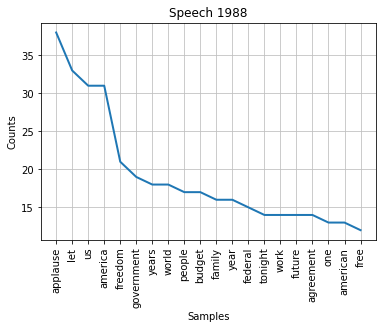

FreqDist({'applause': 38, 'let': 33, 'us': 31, 'america': 31, 'freedom': 21, 'government': 19, 'years': 18, 'world': 18, 'people': 17, 'budget': 17, 'family': 16, 'year': 16, 'federal': 15, 'tonight': 14, 'work': 14, 'future': 14, 'agreement': 14, 'one': 13, 'american': 13, 'free': 12, ...})
speech year: 1989


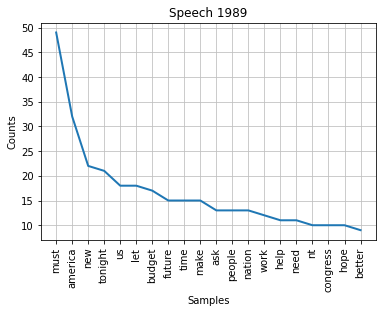

FreqDist({'must': 49, 'america': 32, 'new': 22, 'tonight': 21, 'us': 18, 'let': 18, 'budget': 17, 'future': 15, 'time': 15, 'make': 15, 'ask': 13, 'people': 13, 'nation': 13, 'work': 12, 'help': 11, 'need': 11, 'nt': 10, 'congress': 10, 'hope': 10, 'better': 9, ...})
speech year: 1990


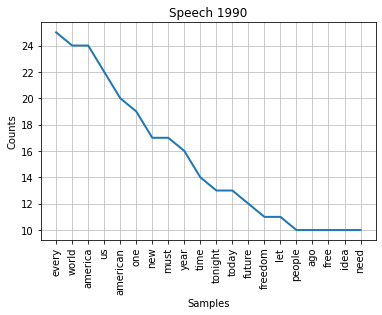

FreqDist({'every': 25, 'world': 24, 'america': 24, 'us': 22, 'american': 20, 'one': 19, 'new': 17, 'must': 17, 'year': 16, 'time': 14, 'tonight': 13, 'today': 13, 'future': 12, 'freedom': 11, 'let': 11, 'people': 10, 'ago': 10, 'free': 10, 'idea': 10, 'need': 10, ...})
speech year: 1991


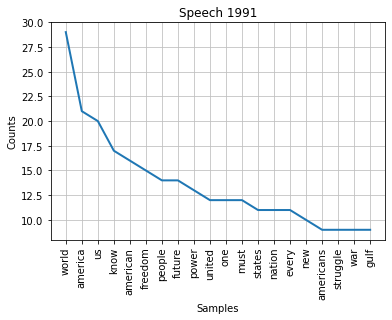

FreqDist({'world': 29, 'america': 21, 'us': 20, 'know': 17, 'american': 16, 'freedom': 15, 'people': 14, 'future': 14, 'power': 13, 'united': 12, 'one': 12, 'must': 12, 'states': 11, 'nation': 11, 'every': 11, 'new': 10, 'americans': 9, 'struggle': 9, 'war': 9, 'gulf': 9, ...})
speech year: 1992


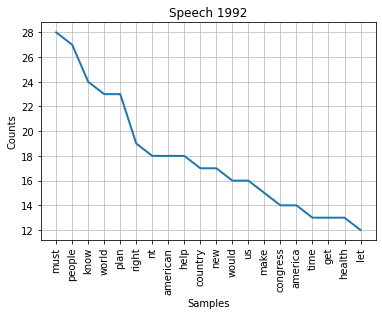

FreqDist({'must': 28, 'people': 27, 'know': 24, 'world': 23, 'plan': 23, 'right': 19, 'nt': 18, 'american': 18, 'help': 18, 'country': 17, 'new': 17, 'would': 16, 'us': 16, 'make': 15, 'congress': 14, 'america': 14, 'time': 13, 'get': 13, 'health': 13, 'let': 12, ...})
speech year: 1993


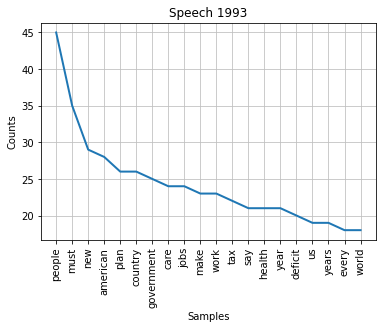

FreqDist({'people': 45, 'must': 35, 'new': 29, 'american': 28, 'plan': 26, 'country': 26, 'government': 25, 'care': 24, 'jobs': 24, 'make': 23, 'work': 23, 'tax': 22, 'say': 21, 'health': 21, 'year': 21, 'deficit': 20, 'us': 19, 'years': 19, 'every': 18, 'world': 18, ...})
speech year: 1994


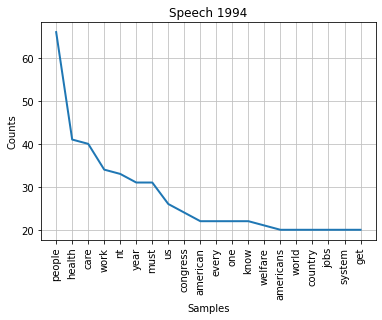

FreqDist({'people': 66, 'health': 41, 'care': 40, 'work': 34, 'nt': 33, 'year': 31, 'must': 31, 'us': 26, 'congress': 24, 'american': 22, 'every': 22, 'one': 22, 'know': 22, 'welfare': 21, 'americans': 20, 'world': 20, 'country': 20, 'jobs': 20, 'system': 20, 'get': 20, ...})
speech year: 1995


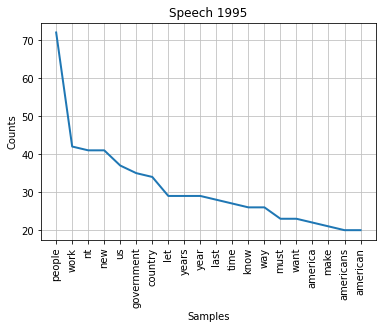

FreqDist({'people': 72, 'work': 42, 'nt': 41, 'new': 41, 'us': 37, 'government': 35, 'country': 34, 'let': 29, 'years': 29, 'year': 29, 'last': 28, 'time': 27, 'know': 26, 'way': 26, 'must': 23, 'want': 23, 'america': 22, 'make': 21, 'americans': 20, 'american': 20, ...})
speech year: 1996


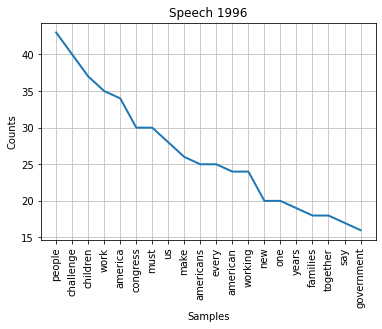

FreqDist({'people': 43, 'challenge': 40, 'children': 37, 'work': 35, 'america': 34, 'congress': 30, 'must': 30, 'us': 28, 'make': 26, 'americans': 25, 'every': 25, 'american': 24, 'working': 24, 'new': 20, 'one': 20, 'years': 19, 'families': 18, 'together': 18, 'say': 17, 'government': 16, ...})
speech year: 1997


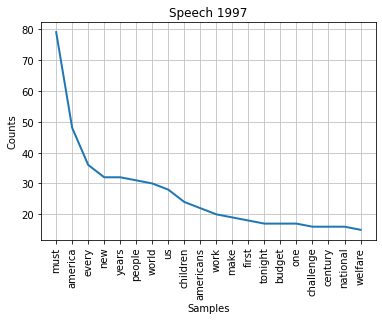

FreqDist({'must': 79, 'america': 48, 'every': 36, 'new': 32, 'years': 32, 'people': 31, 'world': 30, 'us': 28, 'children': 24, 'americans': 22, 'work': 20, 'make': 19, 'first': 18, 'tonight': 17, 'budget': 17, 'one': 17, 'challenge': 16, 'century': 16, 'national': 16, 'welfare': 15, ...})
speech year: 1998


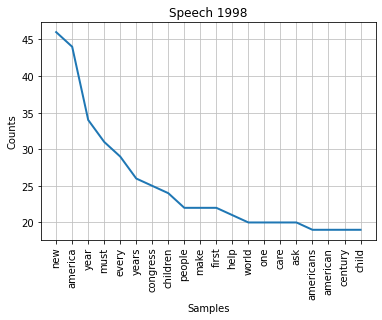

FreqDist({'new': 46, 'america': 44, 'year': 34, 'must': 31, 'every': 29, 'years': 26, 'congress': 25, 'children': 24, 'people': 22, 'make': 22, 'first': 22, 'help': 21, 'world': 20, 'one': 20, 'care': 20, 'ask': 20, 'americans': 19, 'american': 19, 'century': 19, 'child': 19, ...})
speech year: 1999


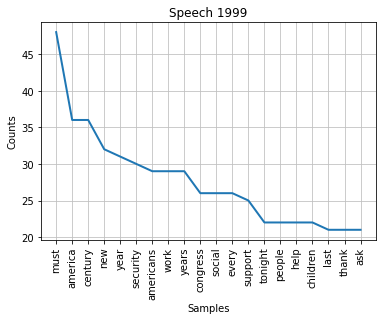

FreqDist({'must': 48, 'america': 36, 'century': 36, 'new': 32, 'year': 31, 'security': 30, 'americans': 29, 'work': 29, 'years': 29, 'congress': 26, 'social': 26, 'every': 26, 'support': 25, 'tonight': 22, 'people': 22, 'help': 22, 'children': 22, 'last': 21, 'thank': 21, 'ask': 21, ...})
speech year: 2000


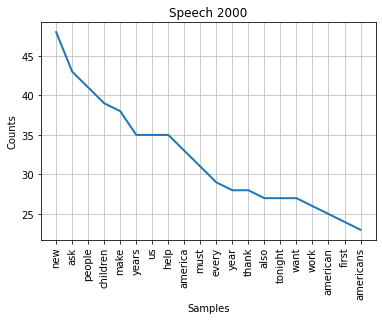

FreqDist({'new': 48, 'ask': 43, 'people': 41, 'children': 39, 'make': 38, 'years': 35, 'us': 35, 'help': 35, 'america': 33, 'must': 31, 'every': 29, 'year': 28, 'thank': 28, 'also': 27, 'tonight': 27, 'want': 27, 'work': 26, 'american': 25, 'first': 24, 'americans': 23, ...})
speech year: 2001


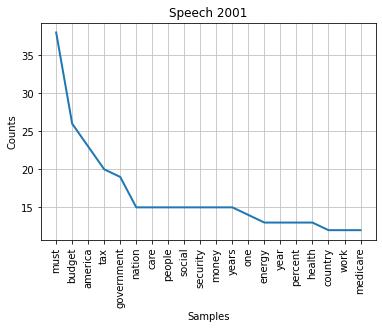

FreqDist({'must': 38, 'budget': 26, 'america': 23, 'tax': 20, 'government': 19, 'nation': 15, 'care': 15, 'people': 15, 'social': 15, 'security': 15, 'money': 15, 'years': 15, 'one': 14, 'energy': 13, 'year': 13, 'percent': 13, 'health': 13, 'country': 12, 'work': 12, 'medicare': 12, ...})
speech year: 2002


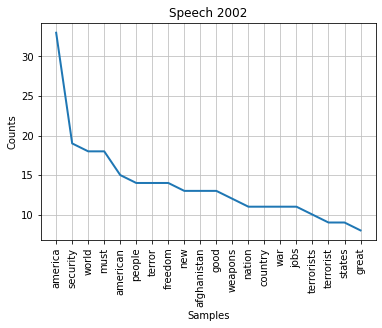

FreqDist({'america': 33, 'security': 19, 'world': 18, 'must': 18, 'american': 15, 'people': 14, 'terror': 14, 'freedom': 14, 'new': 13, 'afghanistan': 13, 'good': 13, 'weapons': 12, 'nation': 11, 'country': 11, 'war': 11, 'jobs': 11, 'terrorists': 10, 'terrorist': 9, 'states': 9, 'great': 8, ...})
speech year: 2003


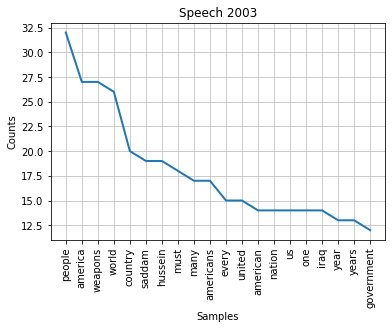

FreqDist({'people': 32, 'america': 27, 'weapons': 27, 'world': 26, 'country': 20, 'saddam': 19, 'hussein': 19, 'must': 18, 'many': 17, 'americans': 17, 'every': 15, 'united': 15, 'american': 14, 'nation': 14, 'us': 14, 'one': 14, 'iraq': 14, 'year': 13, 'years': 13, 'government': 12, ...})
speech year: 2004


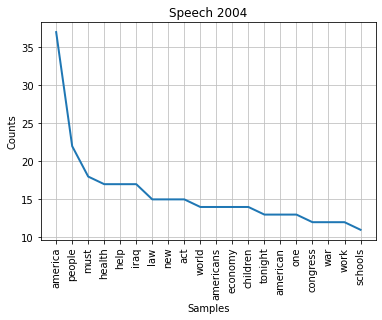

FreqDist({'america': 37, 'people': 22, 'must': 18, 'health': 17, 'help': 17, 'iraq': 17, 'law': 15, 'new': 15, 'act': 15, 'world': 14, 'americans': 14, 'economy': 14, 'children': 14, 'tonight': 13, 'american': 13, 'one': 13, 'congress': 12, 'war': 12, 'work': 12, 'schools': 11, ...})
speech year: 2005


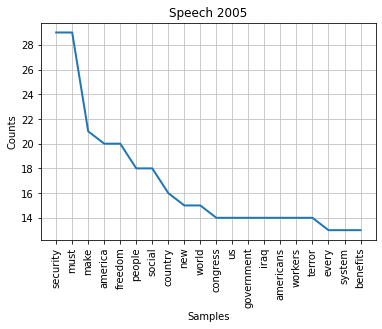

FreqDist({'security': 29, 'must': 29, 'make': 21, 'america': 20, 'freedom': 20, 'people': 18, 'social': 18, 'country': 16, 'new': 15, 'world': 15, 'congress': 14, 'us': 14, 'government': 14, 'iraq': 14, 'americans': 14, 'workers': 14, 'terror': 14, 'every': 13, 'system': 13, 'benefits': 13, ...})
speech year: 2006


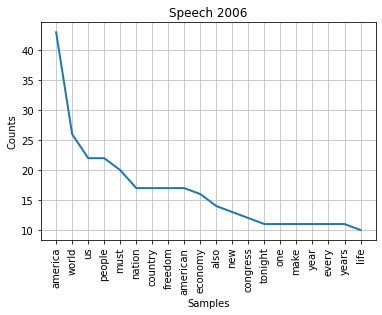

FreqDist({'america': 43, 'world': 26, 'us': 22, 'people': 22, 'must': 20, 'nation': 17, 'country': 17, 'freedom': 17, 'american': 17, 'economy': 16, 'also': 14, 'new': 13, 'congress': 12, 'tonight': 11, 'one': 11, 'make': 11, 'year': 11, 'every': 11, 'years': 11, 'life': 10, ...})
speech year: 2007


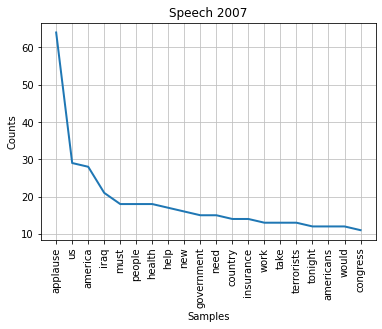

FreqDist({'applause': 64, 'us': 29, 'america': 28, 'iraq': 21, 'must': 18, 'people': 18, 'health': 18, 'help': 17, 'new': 16, 'government': 15, 'need': 15, 'country': 14, 'insurance': 14, 'work': 13, 'take': 13, 'terrorists': 13, 'tonight': 12, 'americans': 12, 'would': 12, 'congress': 11, ...})
speech year: 2008


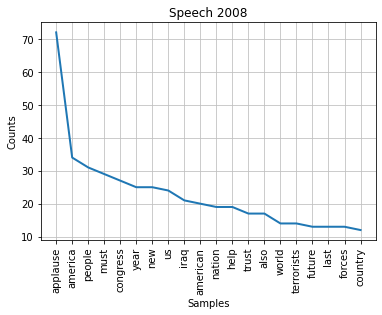

FreqDist({'applause': 72, 'america': 34, 'people': 31, 'must': 29, 'congress': 27, 'year': 25, 'new': 25, 'us': 24, 'iraq': 21, 'american': 20, 'nation': 19, 'help': 19, 'trust': 17, 'also': 17, 'world': 14, 'terrorists': 14, 'future': 13, 'last': 13, 'forces': 13, 'country': 12, ...})
speech year: 2009


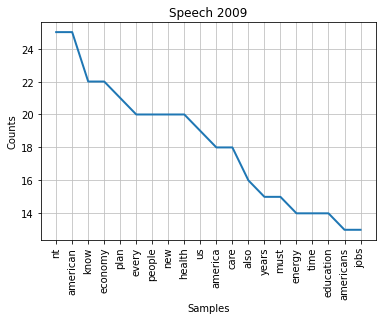

FreqDist({'nt': 25, 'american': 25, 'know': 22, 'economy': 22, 'plan': 21, 'every': 20, 'people': 20, 'new': 20, 'health': 20, 'us': 19, 'america': 18, 'care': 18, 'also': 16, 'years': 15, 'must': 15, 'energy': 14, 'time': 14, 'education': 14, 'americans': 13, 'jobs': 13, ...})
speech year: 2010


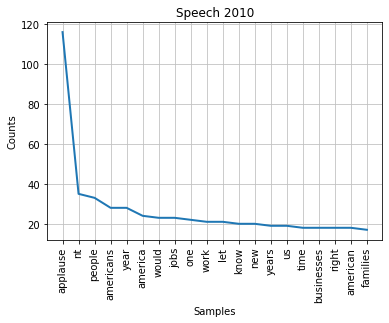

FreqDist({'applause': 116, 'nt': 35, 'people': 33, 'americans': 28, 'year': 28, 'america': 24, 'would': 23, 'jobs': 23, 'one': 22, 'work': 21, 'let': 21, 'know': 20, 'new': 20, 'years': 19, 'us': 19, 'time': 18, 'businesses': 18, 'right': 18, 'american': 18, 'families': 17, ...})
speech year: 2011


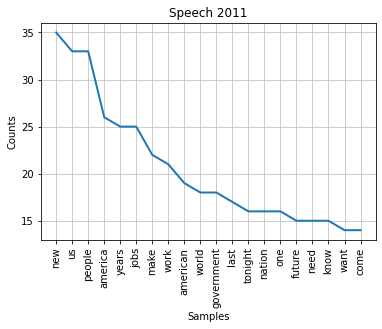

FreqDist({'new': 35, 'us': 33, 'people': 33, 'america': 26, 'years': 25, 'jobs': 25, 'make': 22, 'work': 21, 'american': 19, 'world': 18, 'government': 18, 'last': 17, 'tonight': 16, 'nation': 16, 'one': 16, 'future': 15, 'need': 15, 'know': 15, 'want': 14, 'come': 14, ...})
speech year: 2012


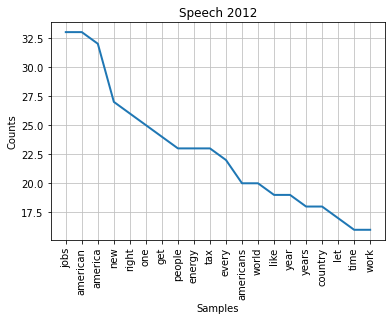

FreqDist({'jobs': 33, 'american': 33, 'america': 32, 'new': 27, 'right': 26, 'one': 25, 'get': 24, 'people': 23, 'energy': 23, 'tax': 23, 'every': 22, 'americans': 20, 'world': 20, 'like': 19, 'year': 19, 'years': 18, 'country': 18, 'let': 17, 'time': 16, 'work': 16, ...})
speech year: 2013


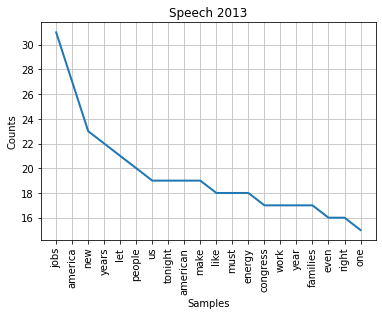

FreqDist({'jobs': 31, 'america': 27, 'new': 23, 'years': 22, 'let': 21, 'people': 20, 'us': 19, 'tonight': 19, 'american': 19, 'make': 19, 'like': 18, 'must': 18, 'energy': 18, 'congress': 17, 'work': 17, 'year': 17, 'families': 17, 'even': 16, 'right': 16, 'one': 15, ...})
speech year: 2014


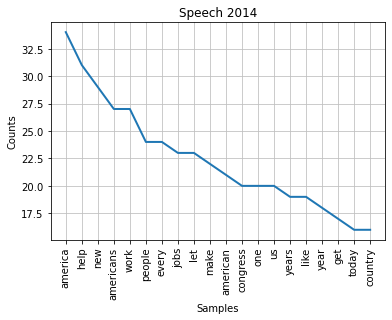

FreqDist({'america': 34, 'help': 31, 'new': 29, 'americans': 27, 'work': 27, 'people': 24, 'every': 24, 'jobs': 23, 'let': 23, 'make': 22, 'american': 21, 'congress': 20, 'one': 20, 'us': 20, 'years': 19, 'like': 19, 'year': 18, 'get': 17, 'today': 16, 'country': 16, ...})
speech year: 2015


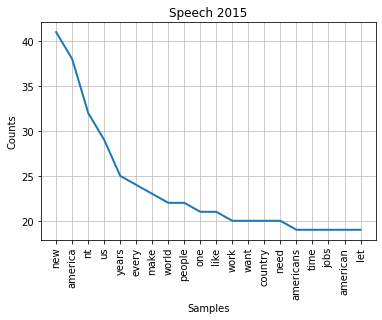

FreqDist({'new': 41, 'america': 38, 'nt': 32, 'us': 29, 'years': 25, 'every': 24, 'make': 23, 'world': 22, 'people': 22, 'one': 21, 'like': 21, 'work': 20, 'want': 20, 'country': 20, 'need': 20, 'americans': 19, 'time': 19, 'jobs': 19, 'american': 19, 'let': 19, ...})
speech year: 2016


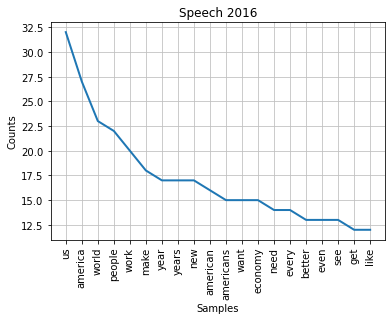

FreqDist({'us': 32, 'america': 27, 'world': 23, 'people': 22, 'work': 20, 'make': 18, 'year': 17, 'years': 17, 'new': 17, 'american': 16, 'americans': 15, 'want': 15, 'economy': 15, 'need': 14, 'every': 14, 'better': 13, 'even': 13, 'see': 13, 'get': 12, 'like': 12, ...})
speech year: 2017


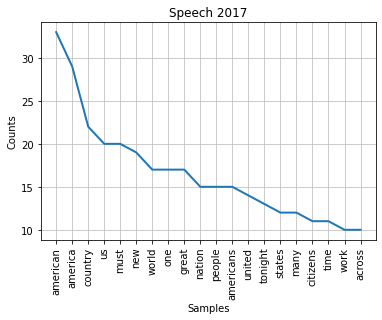

FreqDist({'american': 33, 'america': 29, 'country': 22, 'us': 20, 'must': 20, 'new': 19, 'world': 17, 'one': 17, 'great': 17, 'nation': 15, 'people': 15, 'americans': 15, 'united': 14, 'tonight': 13, 'states': 12, 'many': 12, 'citizens': 11, 'time': 11, 'work': 10, 'across': 10, ...})
speech year: 2018


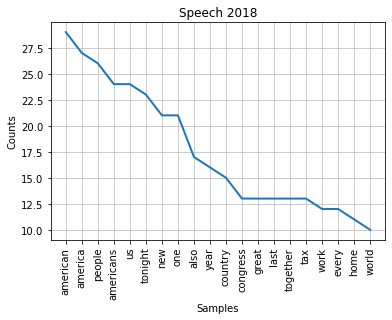

FreqDist({'american': 29, 'america': 27, 'people': 26, 'americans': 24, 'us': 24, 'tonight': 23, 'new': 21, 'one': 21, 'also': 17, 'year': 16, 'country': 15, 'congress': 13, 'great': 13, 'last': 13, 'together': 13, 'tax': 13, 'work': 12, 'every': 12, 'home': 11, 'world': 10, ...})
speech year: 2019


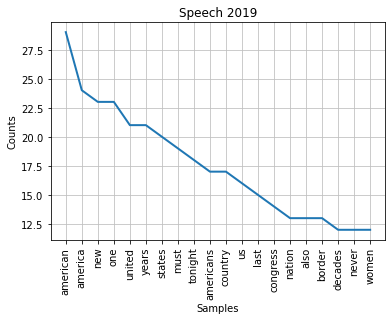

FreqDist({'american': 29, 'america': 24, 'new': 23, 'one': 23, 'united': 21, 'years': 21, 'states': 20, 'must': 19, 'tonight': 18, 'americans': 17, 'country': 17, 'us': 16, 'last': 15, 'congress': 14, 'nation': 13, 'also': 13, 'border': 13, 'decades': 12, 'never': 12, 'women': 12, ...})
speech year: 2020


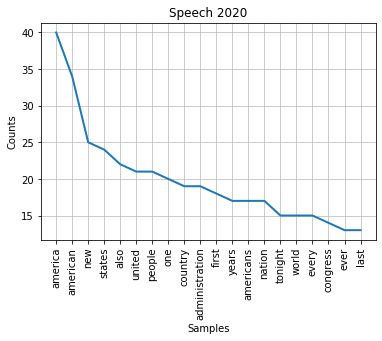

FreqDist({'america': 40, 'american': 34, 'new': 25, 'states': 24, 'also': 22, 'united': 21, 'people': 21, 'one': 20, 'country': 19, 'administration': 19, 'first': 18, 'years': 17, 'americans': 17, 'nation': 17, 'tonight': 15, 'world': 15, 'every': 15, 'congress': 14, 'ever': 13, 'last': 13, ...})


In [8]:
#New word count list. 


from nltk import FreqDist

wordlist = []

#Checks word freq in all speeches
for speech in df_after_first_clean['speech']:
    freqDist = FreqDist(speech)
    wordlist.append(freqDist)


#plots and print top 20 words for all speeches 
year = 1900
for i in range(120):
    year = year ++ 1
    print("speech year: " + str(year))
    wordlist[i].plot(20, title='Speech ' + str(year))
    wordlist[i].pprint(maxlen=20)
